Importing Packages

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import Lambda, Flatten, Dense
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.layers import Layer
from tensorflow.keras import backend as K
K.set_image_data_format('channels_last')
import os
import numpy as np
from numpy import genfromtxt
import pandas as pd
import tensorflow as tf
import PIL

%matplotlib inline
%load_ext autoreload
%autoreload 2

Importing Model

In [2]:
from tensorflow.keras.models import model_from_json

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights('model.h5')

In [3]:
print(model.inputs)
print(model.outputs)

[<KerasTensor: shape=(None, 160, 160, 3) dtype=float32 (created by layer 'input_1')>]
[<KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'Bottleneck_BatchNorm')>]


Loading the Pre-Trained Model

In [4]:
FRmodel = model

Encoding Image

In [5]:
import numpy as np
import cv2 as cv

face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

from google.colab.patches import cv2_imshow
from PIL import Image
l=[]
def image_crop(image):
  img=cv.imread(image)
  im = Image.open(image,'r')
  gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
  faces=face_cascade.detectMultiScale(gray,1.1,5)
  faces=np.array(faces).tolist()
  #print(faces[0])
  # l1=[]
  # l1.append(x)
  # l1.append(y)
  # l1.append(w)
  # l1.append(h)
  # print(x,y,w,h)
  # #l.append[[x,y,w,h]]
  # #print(x)
  # #l=np.array(x).tolist()
  # #l.append(1)
  # #print(l[0])
  # #print()
  # l.append(l1)
  mi=10**9
  ind=-1
  l=[]
  for i in range (len(faces)):
    x,y,w,h=faces[i]
    left=int(h)
    top=int(x)
    right=int(y)
    bottom=int(w)
  #   l1=[]
  #   l1.append(x)
  #   l1.append(y)
  #   l1.append(w)
  #   l1.append(h)
  #   # print(x,y,w,h)
  #   # l.append[[x,y,w,h]]
  #   # print(x)
  #   # l=np.array(x).tolist()
  #   # l.append(1)
  #   # print(l[0])
  #   # print()
  #   l.append(l1)
  #   #print(faces[0])

  # print(l) 
    im1=im.crop((left,top,right,bottom))
    im2 = np.array(im)[y:y+h,x:x+w] 
  # im1.show()
  # #print(type(img))
  # #print(type(im2))
  # #print(img.shape)
  # #print(np.array(im2).shape)
    #cv2_imshow(im2)
    #cv.waitKey()
    l.append(im2)

  return l

In [6]:
def img_to_encoding(image_path, model):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(160, 160))
    #print(np.array(img).shape)
    img2=image_crop(image_path)
    #print(img2)
    l=[]
    for i in range(len(img2)):

     img2[i]=cv.resize(img2[i],dsize=(160,160))
     img2[i] = np.around(np.array(img2[i]) / 255.0, decimals=12)
     x_train = np.expand_dims(img2[i], axis=0)
     embedding = model.predict_on_batch(x_train)
     l.append(embedding / np.linalg.norm(embedding, ord=2))

    #print(l)
    return l

In [22]:
!unzip archive.zip

Archive:  archive.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of archive.zip or
        archive.zip.zip, and cannot find archive.zip.ZIP, period.


In [20]:
import os
source_dir=os.path.join('/content','archive.zip','105_classes_pins_dataset')

In [21]:
class IdentityMetadata():
    def __init__(self, base, name, file):
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata(source_dir)

NotADirectoryError: ignored

In [23]:
import glob

jpgFilenamesList = glob.glob('*.jpg')
database = {}
# database["Ankur"] = img_to_encoding("Ankur Patel.jpg", FRmodel)
# database["Anuj"] = img_to_encoding("Anuj Mehta.jpg", FRmodel)
# database["Bhavanit"] = img_to_encoding("Bhavanit Thukral.jpg", FRmodel)
# database["Bhavesh"] = img_to_encoding("Bhavesh Bhatt.jpg", FRmodel)
# database["Saagar"] = img_to_encoding("Saagar Solanki.jpg", FRmodel)
# database["Prashant"] = img_to_encoding("prashant gohel.jpg", FRmodel)
# database["Vin"] = img_to_encoding("vin diesel.jpg", FRmodel)
#print(jpgFilenamesList)

for x in jpgFilenamesList:

  database[x]=img_to_encoding(x,FRmodel)

print(database.keys())

dict_keys(['Anthony Mackie6_541.jpg', 'Anne Hathaway1_294.jpg', 'Andy Samberg0_429.jpg', 'Alex Lawther3_104.jpg', 'Alexandra Daddario1_215.jpg', 'amber heard1_212.jpg', 'Amanda Crew0_0.jpg', 'Adriana Lima0_0.jpg', 'alycia dabnem carey1_1.jpg', 'Alvaro Morte11_157.jpg'])


In [ ]:
Ankur = tf.keras.preprocessing.image.load_img("Ankur Patel.jpg", target_size=(160, 160))
Anuj = tf.keras.preprocessing.image.load_img("Anuj Mehta.jpg", target_size=(160, 160))

In [ ]:
np.around(np.array(Ankur) / 255.0, decimals=12).shape

(160, 160, 3)

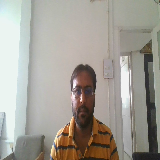

In [ ]:
Ankur 

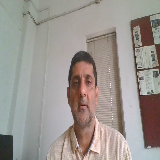

In [ ]:
Anuj

Face Recognition Function

In [ ]:
import numpy as np
import cv2 as cv

face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

495 105 292 292
500 227 272 272


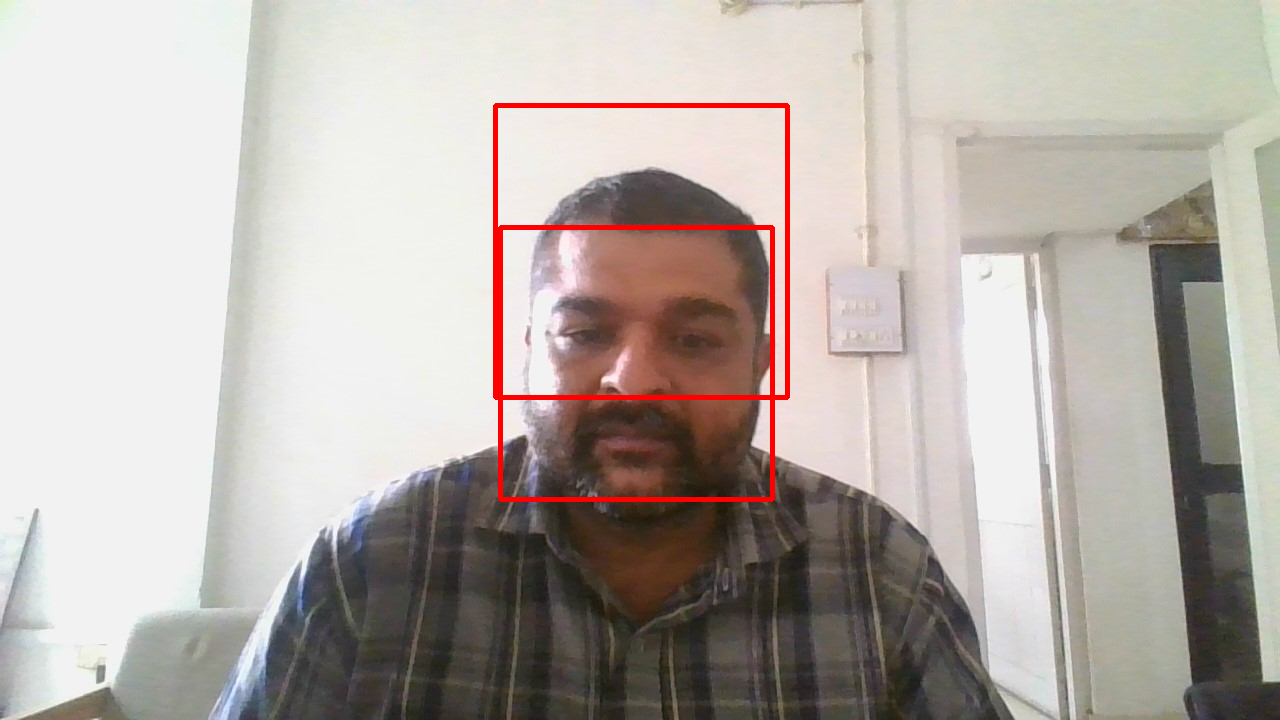

-1

In [ ]:
from google.colab.patches import cv2_imshow
from PIL import Image
img=cv.imread('Saagar Solanki_test.jpg')
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
faces=face_cascade.detectMultiScale(gray,1.1,5)
l=[]
for (x,y,w,h) in faces:
  cv.rectangle(img,(x,y),(x+w,y+h),(0,0,255),3)
  l1=[]
  l1.append(x)
  l1.append(y)
  l1.append(w)
  l1.append(h)
  print(x,y,w,h)
  #l.append[[x,y,w,h]]
  #print(x)
  #l=np.array(x).tolist()
  #l.append(1)
  #print(l[0])
  #print()
  l.append(l1)

#print(l)
cv2_imshow(img)
cv.waitKey()

In [24]:
def who_is_it(image_path, database, model):
    """
    Implements face recognition for the office by finding who is the person on the image_path image.
    
    Arguments:
        image_path -- path to an image
        database -- database containing image encodings along with the name of the person on the image
        model -- your Inception model instance in Keras
    
    Returns:
        min_dist -- the minimum distance between image_path encoding and the encodings from the database
        identity -- string, the name prediction for the person on image_path
    """
    
    ### START CODE HERE

    ## Step 1: Compute the target "encoding" for the image. Use img_to_encoding() see example above. ## (≈ 1 line)
    encoding =  img_to_encoding(image_path,model)
    
    ## Step 2: Find the closest encoding ##
    
    # Initialize "min_dist" to a large value, say 100 (≈1 line)
    min_dist = 100
    
    # Loop over the database dictionary's names and encodings.
    for (name, db_enc) in database.items():
        dist=10**9
        
        # Compute L2 distance between the target "encoding" and the current db_enc from the database. (≈ 1 line)
        for i in range(len(encoding)):
          dist=min(dist,np.linalg.norm(encoding[i]-db_enc))

          #dist = np.linalg.norm(encoding-db_enc)

        # If this distance is less than the min_dist, then set min_dist to dist, and identity to name. (≈ 3 lines)
        if dist<min_dist:
            min_dist = dist
            identity = name
    ### END CODE HERE
    
    if min_dist > 0.96:
        print("Not in the database.")
    else:
        print ("it's " + str(identity) + ", the distance is " + str(min_dist))
        
    return min_dist, identity

In [40]:
# BEGIN UNIT TEST
# Test 1 with Younes pictures 
#who_is_it("Anuj Mehta_test.jpg", database, FRmodel)
#who_is_it("Ankur Patel_test.jpg", database, FRmodel)
#who_is_it("Prashant Gohel_test.jpg", database, FRmodel)
#who_is_it("Saagar Solanki_test.jpg", database, FRmodel)
#who_is_it("Bhavanit Thukral_test.jpg", database, FRmodel)
#who_is_it("Bhavesh Bhatt_test.jpg", database, FRmodel)
#who_is_it("vin diesel_test.jpg", database, FRmodel)
#who_is_it("yogi adityanath_test.jpg", database, FRmodel)
#who_is_it("Aaron_Peirsol_test.jpg", database, FRmodel)
#who_is_it("Arianna_Huffington_test.jpg", database, FRmodel)
# who_is_it("mindykaling_test.jpg", database, FRmodel)
# who_is_it("benaffleck_test.jpg", database, FRmodel)
# who_is_it("jerryseinfeld_test.jpg", database, FRmodel)
# who_is_it("madonna_test.jpg", database, FRmodel)
# who_is_it("johnelton_test.jpg", database, FRmodel)
who_is_it("Adriana Lima11_12.jpg", database, FRmodel)
who_is_it("Alex Lawther12_16.jpg", database, FRmodel)
who_is_it("Alexandra Daddario25_361.jpg", database, FRmodel)
who_is_it("Alvaro Morte60_261.jpg", database, FRmodel)
who_is_it("alycia dabnem carey21_105.jpg", database, FRmodel)
who_is_it("Amanda Crew53_87.jpg", database, FRmodel)
who_is_it("/content/amber heard22_328.jpg", database, FRmodel)
who_is_it("/content/Andy Samberg24_546.jpg", database, FRmodel)
who_is_it("/content/Anne Hathaway39_443.jpg", database, FRmodel)

# who_is_it("parshwa_test.png", database, FRmodel)
#who_is_it("paulomi_test.jpg", database, FRmodel)
# Test 2 with Younes pictures 
#test1 = who_is_it("images/camera_0.jpg", database, FRmodel)
#assert np.isclose(test1[0], 0.5992946)
#assert test1[1] == 'younes'

# Test 3 with Younes pictures 
#test2 = who_is_it("images/younes.jpg", database, FRmodel)
#assert np.isclose(test2[0], 0.0)
#assert test2[1] == 'younes'
# END UNIT TEST

it's Adriana Lima0_0.jpg, the distance is 0.7945999
it's Alex Lawther3_104.jpg, the distance is 0.60937965
it's Alexandra Daddario1_215.jpg, the distance is 0.94483906
it's Alvaro Morte11_157.jpg, the distance is 0.93147075
it's alycia dabnem carey1_1.jpg, the distance is 0.7597927
it's Amanda Crew0_0.jpg, the distance is 0.73765343
it's amber heard1_212.jpg, the distance is 0.5897754
it's Andy Samberg0_429.jpg, the distance is 0.6393531
it's Anne Hathaway1_294.jpg, the distance is 0.54707664


(0.54707664, 'Anne Hathaway1_294.jpg')